In [ ]:
# ipypublish
from ipypublish.scripts.ipynb_latex_setup import *

In [1]:
# impressão de gráficos inline 
%matplotlib inline

# Tópico: Ajuste de Curvas 

**Professor:** Gustavo Oliveira, gustavo.oliveira@ci.ufpb.br

**Monitor:** Smith Lima, smith.lima@eng.ci.ufpb.br

## Descrição 

Notebook desenvolvido para suporte ao curso de Cálculo Numérico. Solucionário matemático e computacional de exemplo e da Lista de Exercícios 5.

**Obs.:**: função `polyfit` retorna coeficientes da curva de ajuste na ordem: 
```python 
P = p[0] + p[1]*x + p[2]*x**2 + p[3]*x**3 + ...
```

In [2]:
# importação de módulos
import numpy as np
import matplotlib.pyplot as plt

### Exemplo: solução fechada 2D 

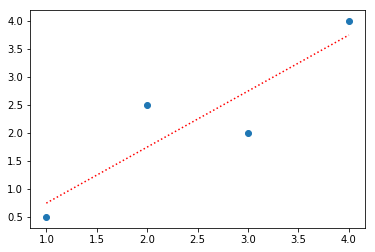

In [3]:
# tabela de dados
x = np.array([1,2,3,4])
y = np.array([0.5,2.5,2.0,4.0])

# min quad
m = np.size(x)
alpha1 = (m*np.dot(x,y) - np.sum(x)*np.sum(y))/(m*np.dot(x,x)-np.sum(x)**2)
alpha0 = np.mean(y) - alpha1*np.mean(x)

# plot
plt.scatter(x,y)
y2 = alpha0 + alpha1*x
plt.plot(x,y2,'r:')

In [ ]:
bbbbbbbbbbbb

## Resolução da Lista 5

### Função-base para computar ajuste e plotar resultados

In [4]:
"""
Resolve problema de ajuste polinomial discreto e plota resultado

    entrada: 
        x,y : tabela de valores (numpy arrays)
        g   : grau do polinômio de ajuste (int)
"""
def resolve_ajuste(x,y,g):
    
    c = np.polyfit(x, y, g) # ajuste
    p = np.poly1d(c) 
    plt.plot(x,y,'d',x,p(x),'o-')
    plt.xlabel(str(x))
    for i in range(g+1):
        print('Coeficiente de ajuste p[' + str(i) + ']: ' + str(c[i]))

    return p

### L5-Q2

Ajuste os dados abaixo pelo método dos mínimos quadrados:

\begin{array}{c|cccccccc}
x & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\
\hline
y & 0.5 & 0.6  & 0.9 & 0.8 & 1.2 & 1.5 &  1.7 & 2.0
\end{array}

a) por reta 

b) por parábola do tipo $ax^2 + bx + c$; 

### Solução

#### Metodologia matemática

a)

$$g_1(x) = x$$$$ g_2(x)=1$$

\begin{array}{c|cccccccc}
g_1 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\
\hline
g_2 & 1 & 1 & 1& 1& 1 & 1 & 1 & 1 \\
\hline
f & 0.5 & 0.6  & 0.9 & 0.8 & 1.2 & 1.5 &  1.7 & 2.0
\end{array}

\begin{eqnarray*}
a_{11} &=& <g_1,g_1> &= 204\\
a_{12} &=& <g_1,g_2> &= 36 \\
a_{21} &=& a_{12}  \\
a_{22} &=& <g_2,g_2> &= 8\\
b_{1} &=&  <g_1,f>   &= 50.5\\
b_{2} &=&  <g_2,f>  &= 9.2
\end{eqnarray*}


$$\begin{bmatrix}
204 & 36 \\
36 &  8
\end{bmatrix}
\begin{bmatrix}
\alpha_1 \\
\alpha_2 
\end{bmatrix} = 
\begin{bmatrix}
50.5 \\
9.2
\end{bmatrix}$$

$$\begin{align*}
204\alpha_1+36\alpha_2 &= 50.5 \\
36\alpha_1+8\alpha_2 &= 9.2
\end{align*}$$


$$\alpha_1 = 0.2166 ,\  \alpha_2 = 0.175$$

$$f(x) = 0.1749x + 0.2167$$

b) 

$$g_1(x) = x²$$$$ g_2(x)=x$$$$ g_3(x)=1$$ 

\begin{array}{c|cccccccc}
g_1 & 1 & 4 & 9 & 16 & 25 & 36 & 49 & 64 \\
\hline
g_2 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\
\hline
g_3 & 1 & 1 & 1& 1& 1 & 1 & 1 & 1 \\
\hline
f & 0.5 & 0.6  & 0.9 & 0.8 & 1.2 & 1.5 &  1.7 & 2.0
\end{array}

\begin{align*}
a_{11}=\ <g_1,g_1> \ &= 8772\\
a_{12}=\ a_{21}   =\  <g_1,g_2> \ &= 1296 \\
a_{13}=\ a_{31}   =\  <g_1,g_3> \ &= 204 \\
a_{22}=\ <g_2,g_2> \ &= 204\\
a_{23}=\ a_{32}   =\  <g_2,g_3> \ &= 36 \\
a_{33}=\ <g_3,g_3> \ &= 8 \\
b_{1}=\  <g_1,f>  \ &= 319.1\\
b_{2}=\  <g_2,f>  \ &= 50.5\\
b_{3}=\  <g_3,f>  \ &= 9.2
\end{align*}

$$\begin{bmatrix}
8872 & 1296 & 204 \\
1296 &  204 & 36 \\
204 &  36 & 8
\end{bmatrix}
\begin{bmatrix}
\alpha_1 \\
\alpha_2 \\
\alpha_3 
\end{bmatrix} = 
\begin{bmatrix}
319.1\\
50.5 \\
9.2 
\end{bmatrix}$$

$$\begin{align*}
8872\alpha_1+1296\alpha_2 + 204\alpha_3 &= 319.1 \\
1296\alpha_1+204\alpha_2 + 36\alpha_3 &= 50.5 \\
204\alpha_1+36\alpha_2 + 8\alpha_3 &= 9.2
\end{align*}$$

$$\alpha_1 = 0.4071 ,\  \alpha_2 = 0.07738, \  \alpha_3 = 0.01547$$ 

$$f(x) = 0.01547 + 0.07738x + 0.4071x^2$$

#### Metodologia computacional

a)

Coeficiente de ajuste p[0]: 0.21666666666666667
Coeficiente de ajuste p[1]: 0.1749999999999997


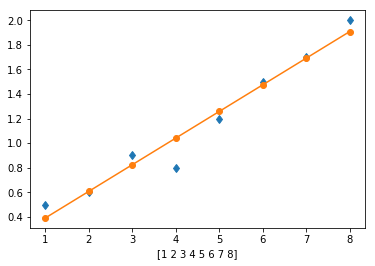

In [5]:
# tabela de dados
x = np.arange(1,9)
y = np.array([0.5,.6,.9,.8,1.2,1.5,1.7,2.])

# grau 1
g = 1
p = resolve_ajuste(x,y,g)

b)

Coeficiente de ajuste p[0]: 0.015476190476190473
Coeficiente de ajuste p[1]: 0.07738095238095231
Coeficiente de ajuste p[2]: 0.4071428571428572


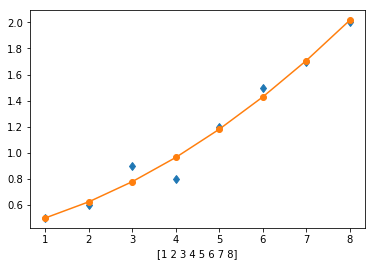

In [6]:
# grau 2
g = 2
p = resolve_ajuste(x,y,g)

### L5-Q3

Dada a tabela abaixo, faça o gráfico de dispersão dos dados e ajuste uma curva da melhor maneira possı́vel:

\begin{array}{c|cccccc}
x & 0.5 & 0.75 & 1 & 1.5 & 2.0 & 2.5 & 3.0  \\
\hline
y & -2.8 & -0.6 & 1& 3.2& 4.8 & 6.0 & 7.0 
\end{array}

### Solução

#### Metodologia matemática


$$g_1(x) = 1$$$$ g_2(x)=x$$$$ g_3(x)=x²$$ $$ g_4(x)=x³$$

\begin{array}{c|cccccc}
g_1 & 1 & 1 & 1& 1& 1 & 1 & 1 \\
g_2 & 0.5 & 0.75 & 1 & 1.5 & 2.0 & 2.5 & 3.0  \\
\hline
g_3 & 0.25 & 0.5625& 1& 2.25& 4 & 6.25 & 9.0\\
\hline
g_4 & 0.1250 & 0.4219 & 1& 3.375& 8 &15. 625 & 27 \\
f & -2.8 & -0.6 & 1& 3.2& 4.8 & 6.0 & 7.0 
\end{array}

\begin{align*}
a_{11}=\ <g_1,g_1> \ &= 7\\
a_{12}=\ a_{21}   =\  <g_1,g_2> \ &= 11.25 \\
a_{13}=\ a_{31}   =\  <g_1,g_3> \ &= 23.3125 \\
a_{14}=\ a_{41}   =\  <g_1,g_4> \ &= 55.5468 \\
a_{22}=\ <g_2,g_2> \ &= 23.3125\\
a_{23}=\ a_{32}   =\  <g_2,g_3> \ &= 55.5468 \\
a_{24}=\ a_{42}   =\  <g_2,g_4> \ &= 142.5039 \\
a_{33}=\ <g_3,g_3> \ &= 142.5039 \\
a_{34}=\ <g_3,g_4> \ &= 381.5185 \\
a_{44}=\ <g_4,g_4> \ &= 1049.7248 \\
b_{1}=\  <g_1,f>  \ &= 18.6\\
b_{2}=\  <g_2,f>  \ &= 49.55\\
b_{3}=\  <g_3,f>  \ &= 126.86\\
b_{4}=\  <g_4,f>  \ &= 332.34
\end{align*}

$$\begin{bmatrix}
7 & 11.25 & 23.3125 & 55.5468 \\
11.25 &  23.3125 & 55.5468 & 142.5039 \\
23.3125 &  55.5468 & 142.5039 & 381.5185\\
55.5468 &  142.5039 & 381.5185 & 1049.7248
\end{bmatrix}
\begin{bmatrix}
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\alpha_4 
\end{bmatrix} = 
\begin{bmatrix}
18.6\\
49.55 \\
126.8625\\
332.3468
\end{bmatrix}$$

$$\alpha_1 = -8.1043 ,\  \alpha_2 = 12.7882 \  \alpha_3 = -4.3250 , \  \alpha_4 = 0.5813$$

$$f(x) = 0.5813  - 4.3250x + 12.79x^2 - 8.1043x^3$$

#### Metodologia computacional

Coeficiente de ajuste p[0]: 0.5888082299746916
Coeficiente de ajuste p[1]: -4.365386461549383
Coeficiente de ajuste p[2]: 12.851592009434105
Coeficiente de ajuste p[3]: -8.131256481519875


0.040251260748211545

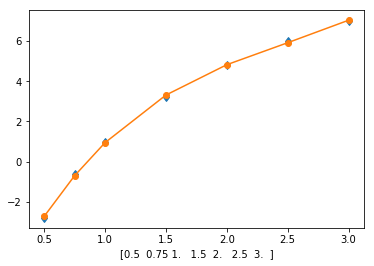

In [7]:
# tabela
x = np.array([0.5,0.75,1,1.5,2.0,2.5,3.0])
y = np.array([-2.8,-0.6,1,3.2,4.8,6.0,7.0])

# grau (teste para g = 2,3,4,5 e veja o erro)
g = 3
p = resolve_ajuste(x,y,g)

# erro 
np.sum((p(x)-y)**2)

### L5-Q4

A tabela abaixo mostra as alturas e pesos de nove homens entre as idades de 25 a 29 anos extraı́da ao acaso entre funcionários de uma grande indústria:

\begin{array}{c|ccccccccc}
\text{Altura/cm} & 183& 173 & 168 & 188  & 158 & 163 & 193 &163 &178 \\
\hline
\text{Peso/kg} & 79 & 69 & 70& 81  & 61 &63 &79 & 71 & 73
\end{array}

#### Metodologia matemática 

$$g_1(x) = 1$$$$ g_2(x)=x$$

\begin{array}{c|cccccccc}
g_1 & 1 & 1 & 1& 1& 1 & 1 & 1 & 1&1\\
\hline
g_2 & 183& 173 & 168 & 188  & 158 & 163 & 193 &163 &178 \\
\hline
f &  79 & 69 & 70& 81  & 61 &63 &79 & 71 & 73
\end{array}

\begin{align*}
a_{11}=\ <g_1,g_1> \ &= 9\\
a_{12}=\ a_{21}   =  <g_1,g_2> \ &= 1567 \\
a_{22}=\ <g_2,g_2> \ &= 274.021\\
b_{1}=\ <g_1,f>  \ &= 646\\
b_{2}=\ <g_2,f>  \ &= 113.103
\end{align*}

$$\begin{bmatrix}
9 & 1567 \\
1567 &  274.021
\end{bmatrix}
\begin{bmatrix}
\alpha_1 \\
\alpha_2 
\end{bmatrix} = 
\begin{bmatrix}
646 \\
113.103
\end{bmatrix}$$

$$\alpha_1 = -20.0832 ,\  \alpha_2 = 0.5276$$

$$f(x) = 0.5276x - 20.0832$$

#### Metodologia computacional

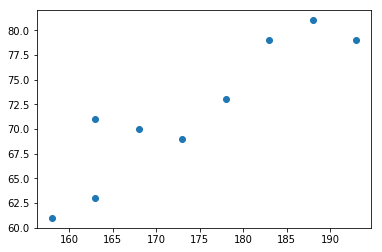

In [8]:
altura = np.array([183,173,168,188,158,163,193,163,178])
peso = np.array([79,69,70,81,61,63,79,71,73])

# gráfico de dispersão 
plt.scatter(altura,peso)

### solucao-L5-Q4-b

Coeficiente de ajuste p[0]: 0.527570093457944
Coeficiente de ajuste p[1]: -20.078037383177602


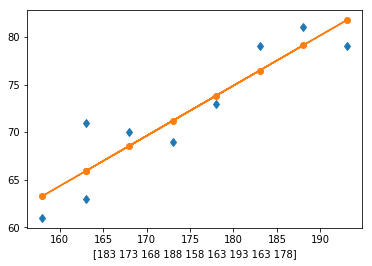

In [9]:
# ajuste da reta 
p = resolve_ajuste(altura,peso,1)

### solucao-L5-Q4-c

In [10]:
# estimativa de peso (kg)
alt = 175 
p_c = p(alt)
print(p_c)

# estimativa de altura (cm)
alt = 80
a_c = (alt - p[0])/p[1]
print(a_c)


72.24672897196261
189.69619131975202


### solucao-L5-Q4-d

Coeficiente de ajuste p[0]: 1.5856741573033695
Coeficiente de ajuste p[1]: 60.294943820224766


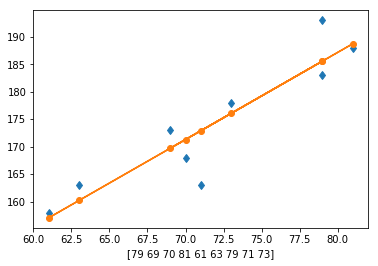

In [11]:
p2 = resolve_ajuste(peso,altura,1)

### solucao-L5-Q4-e

In [12]:
# estimativa de peso a partir de altura com novo ajuste 
alt = 175
p_e = (alt - p2[0])/p2[1]
print(p_e)

# comparação com item (c): pesos 
# pequena diferença entre os valores
dif = abs(p_c-p_e)
print(dif)


72.33835252435786
0.091623552395248


### solucao-L5-Q4-f

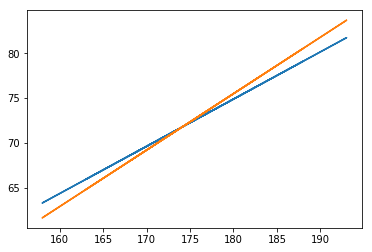

In [13]:
# comparação das retas de ajuste
# influência do resíduo => inclinações diferentes

plt.plot(altura,p(altura),altura,(altura - p2[0])/p2[1])

## solucao-L5-Q5-a

#### AJUSTE POR RETA

Coeficiente de ajuste p[0]: 1.7924185769967504
Coeficiente de ajuste p[1]: -3420.8153029001523


208.83231551826748

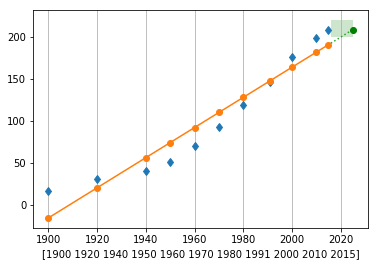

In [14]:
""" 
Nota: pesquisa no IBGE em maio de 2018 
      mostra que a população já rompeu 209 mi. 
"""

# tabela de dados
ano = np.array([1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010, 2015])
hab = np.array([17.4, 30.6, 41.2, 51.9, 70.2, 93.1, 119.0, 146.2, 175.8, 198.6, 207.8])

# plotagem
fig,ax = plt.subplots(1,1)
p = resolve_ajuste(ano,hab,1)
ax.grid(axis='x')

# plotagem do comportamento preditivo

# linha tracejada e area  
ano_m = np.linspace(2016, 2025, num=10, endpoint=True)
v2 = np.ones(np.shape(ano_m))
ax.fill_between(ano_m,200*v2,220*v2,facecolor='g',alpha=0.2)
plt.plot(ano_m,p(ano_m),':')
plt.plot(2025,p(2025),'go')

# estimativa no ano 2025
p(2025)

In [15]:
# abrindo vetor de 1900 a 2024
anos = np.arange(ano[0],ano[-1]+10)
pops = p(anos) # população

# encontrando ano em que a populacao superou 100 mi
lim100 = np.nonzero(pops>100)
lim150 = np.nonzero(pops>150)
lim200 = np.nonzero(pops>200)
np.shape(lim100)
print('Marca de 100 milhões de pessoas: ' + str(anos[lim100[0][0]]))
print('Marca de 150 milhões de pessoas: ' + str(anos[lim150[0][0]]))
print('Marca de 200 milhões de pessoas: ' + str(anos[lim200[0][0]]))


Marca de 100 milhões de pessoas: 1965
Marca de 150 milhões de pessoas: 1993
Marca de 200 milhões de pessoas: 2021


Coeficiente de ajuste p[0]: 1.7924185769967504
Coeficiente de ajuste p[1]: -3420.8153029001523


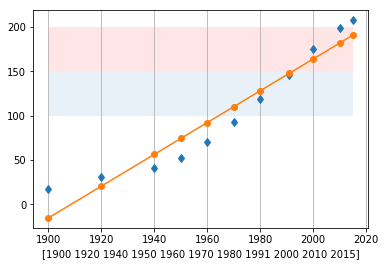

In [16]:
# plotagem por faixas de valores 
fig,ax = plt.subplots(1,1)
p = resolve_ajuste(ano,hab,1)
ax.grid(axis='x')
v1 = np.ones(np.shape(ano))
ax.fill_between(ano,100*v1,150*v1,alpha=0.1)
ax.fill_between(ano,150*v1,200*v1,facecolor='r',alpha=0.1)

### AJUSTE POR PARÁBOLA

Coeficiente de ajuste p[0]: 0.014183494308426046
Coeficiente de ajuste p[1]: -53.81354030388454
Coeficiente de ajuste p[2]: 51061.177900276765


249.95013340013247

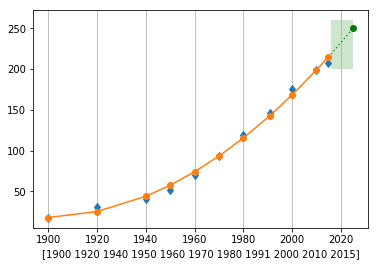

In [17]:


# plotagem
fig,ax = plt.subplots(1,1)
p = resolve_ajuste(ano,hab,2)
ax.grid(axis='x')

# plotagem do comportamento preditivo

# linha tracejada e area  
ano_m = np.linspace(2016, 2025, num=10, endpoint=True)
v2 = np.ones(np.shape(ano_m))
ax.fill_between(ano_m,200*v2,260*v2,facecolor='g',alpha=0.2)
plt.plot(ano_m,p(ano_m),':')
plt.plot(2025,p(2025),'go')

# estimativa no ano 2025
p(2025)

In [18]:
# abrindo vetor de 1900 a 2024
anos = np.arange(ano[0],ano[-1]+10)
pops = p(anos) # população

# encontrando ano em que a populacao superou 100 mi
lim100 = np.nonzero(pops>100)
lim150 = np.nonzero(pops>150)
lim200 = np.nonzero(pops>200)
np.shape(lim100)
print('Marca de 100 milhões de pessoas: ' + str(anos[lim100[0][0]]))
print('Marca de 150 milhões de pessoas: ' + str(anos[lim150[0][0]]))
print('Marca de 200 milhões de pessoas: ' + str(anos[lim200[0][0]]))



Marca de 100 milhões de pessoas: 1974
Marca de 150 milhões de pessoas: 1994
Marca de 200 milhões de pessoas: 2011


Coeficiente de ajuste p[0]: 0.014183494308426046
Coeficiente de ajuste p[1]: -53.81354030388454
Coeficiente de ajuste p[2]: 51061.177900276765


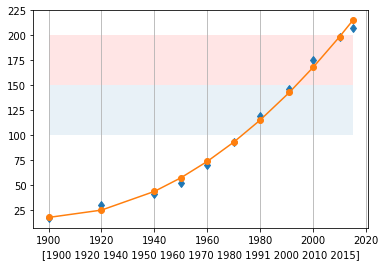

In [19]:
# plotagem por faixas de valores 
fig,ax = plt.subplots(1,1)
p = resolve_ajuste(ano,hab,2)
ax.grid(axis='x')
v1 = np.ones(np.shape(ano))
ax.fill_between(ano,100*v1,150*v1,alpha=0.1)
ax.fill_between(ano,150*v1,200*v1,facecolor='r',alpha=0.1)

# Integração Numérica

## Função-base para integrais de Newton-Cotes

In [20]:
def integral_newton_cotes(x,y,metodo):

    # diff computa h = x[k+1] - x[k]; 
    # duplo diff retorna 0 se igualmente espaçado
    h = np.diff(x)
    hh = np.diff(h) 

    # verifica se vetor é, de fato, de zeros, dentro de tolerância
    # se não, lança erro
    np.testing.assert_allclose(hh, 0*hh, atol=1e-08)

    # switch    
    if metodo is 'trapezio':
    
        # montando vetor de somas y[k] + y[k+1]    
        cs = np.cumsum(y)
        u = np.concatenate((np.array([0]),cs[0:-2]))
        ss = cs[1:]-u # somas 

        # integral (regra generalizada)
        integral = h[0]/2*np.sum(ss)
        
    elif metodo is 'simpson13': 
        
        if np.size(x) % 2 is 0:
            raise ValueError('Regra de Simpson válida apenas para número ímpar de pontos.')    
    
        # constroi pesos 
        
        # ignora primeiro e ultimo
        ie = np.array(range(0,np.size(x)))
        ie = ie[1:-1] % 2

        # pesos para intermediarios
        for v in range(np.size(ie)):
            if ie[v] == 1:
                ie[v] = 4
            elif ie[v] == 0:
                ie[v] = 1            
    
        # concatena para recriar 
        ie = np.concatenate(([1],ie,[1]))        
        
        # integral (regra generalizada)
        integral = h[0]/3*(np.sum(y*ie))
        
            
    return integral 


### Exemplo 

Integração numérica pela regra do trapézio para a função 
$$\int_{a=0}^{b=\pi} [ {\rm sen}(3x + 2) + 0.5\pi ] \, dx \approx I_T $$


In [21]:
# função
a = 0
b = np.pi
x = np.linspace(a,b,num=5,endpoint=True)
f = lambda x: np.sin(3*x + 2) + np.pi/2
y = f(x)

# integração por trapézio
integral_newton_cotes(x,y,'trapezio')

4.799420241706493

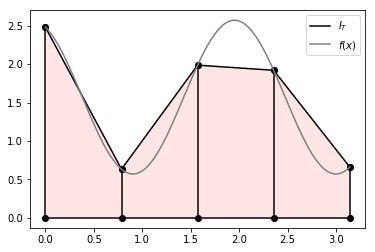

In [22]:
# plotagem dos trapézios
plt.stem(x,y,'-ok',basefmt='k-')
plt.plot(x,y,'-k',label='$I_T$')
plt.fill_between(x,0*y,y,facecolor='r',alpha=0.1)

# "imitação" da função contínua
xx = np.linspace(a,b,num=200,endpoint=True)
plt.plot(xx,f(xx),color=[0.5,0.5,0.5],label='$f(x)$')
plt.legend()

### Exemplo 

Idem, para regra 1/3 de Simpson $I_S$

In [23]:
# integração por 1/3 Simpson 

integral_newton_cotes(x,y,'simpson13')

4.016218444253924

## Função residente em Python para integração

In [24]:
import scipy.integrate as sp

### Exemplo
Mesma função $f(x)$, agora calculada com o Scipy.

In [25]:
# scipy::quad (erro absoluto)
integral_ = sp.quad(f,a,b)
integral_

(4.657370976179917, 1.5031433917569477e-13)

### solucao-L5-Q9

In [26]:
# dados
x = np.array([1.00, 1.05, 1.10, 1.15, 1.20, 1.25, 1.30])
y = np.array([1.0000, 1.0247, 1.0488, 1.0723, 1.0954, 1.1180, 1.1401])

# integral implementada: trapézio
print(integral_newton_cotes(x,y,'trapezio'))

# integral implementada: 1/3 Simpson
print(integral_newton_cotes(x,y,'simpson13'))

# integral scipy: 1/3 Simpson

f = lambda x: np.sqrt(x) 
sp.quad(f,x[0],x[-1])


0.32146250000000026
0.2857383333333336


(0.32148536841925296, 3.569204580991558e-15)

### solucao-L5-Q10

In [27]:
# caso h = 0.1
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([1, 0.995, 0.980, 0.955, 0.921, 0.877, 0.825, 0.764, 0.696, 0.6216, 0.5403])

print(integral_newton_cotes(x,y,'trapezio'))

# integral implementada: 1/3 Simpson
print(integral_newton_cotes(x,y,'simpson13'))

# residente
f = lambda x: np.cos(x) 
print(sp.quad(f,x[0],x[-1]))


# caso h = 0.2
x2 = np.concatenate((x[0:-1:2],[1]))
y2 = np.concatenate((y[0:-1:2],[0.5403]))

print(integral_newton_cotes(x2,y2,'trapezio')) # TODO <=== CHECAR ISTO AQUI!

# integral implementada: 1/3 Simpson
print(integral_newton_cotes(x2[0:-1],y2[0:-1],'simpson13'))

# residente 
print(sp.quad(f,x2[0],x2[-1]))

0.8404750000000001
0.7270900000000001
(0.8414709848078965, 9.34220461887732e-15)
0.83843
0.6557999999999999
(0.8414709848078965, 9.34220461887732e-15)


### solucao-L5-Q11

In [28]:
x = np.array([1.2, 1.3, 1.4, 1.5, 1.6])
y = np.array([0.93204, 0.96356, 0.98545, 0.99749, 0.99957])

print(integral_newton_cotes(x,y,'trapezio'))

# integral implementada: 1/3 Simpson
print(integral_newton_cotes(x,y,'simpson13'))

# residente
f = lambda x: np.sin(x) 

print(sp.quad(f,x[0],x[-1]))

0.39123050000000037
0.35870866666666695
(0.3915572767779624, 4.34715904138419e-15)


### solucao L5-Q17 


In [29]:
z = np.linspace(0,10,num=50,endpoint=True)
f = lambda z: z/(4+z)*np.exp(-0.5*z)

d = integral_newton_cotes(z,z*f(z),'trapezio')/integral_newton_cotes(z,f(z),'trapezio')
print(d)

# residente
f2 = lambda z: ( z/(4+z)*np.exp(-0.5*z) )*z
print(sp.quad(f2,0,10)[0]/sp.quad(f,0,10)[0])

3.0523917901871935
3.0476097824918496


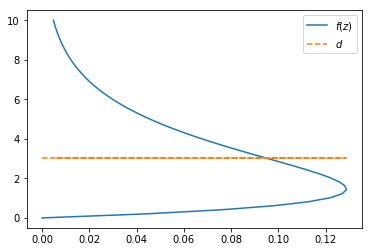

In [30]:
# plotagem da força
plt.plot(f(z),z,label='$f(z)$')
plt.plot(f(z),np.ones(np.shape(f(z)))*d,'--',label='$d$')
plt.legend()

### QUADRATURA GAUSSIANA

Algumas informações:

- A quadratura gaussiana pode ser chamada como 

```python
from scipy.integrate import quadrature
```
Depois de importar, veja 

```python              
help(quadrature)
```

- A tabela de pesos de quadratura pode ser acessada no Numpy através do comando 

```python
np.polynomial.legendre.leggauss(ord)
```
Integra exatamente polinômios de grau até 

```python
2*ord - 1
```

### solucao-L5-Q18a

In [31]:
from scipy.integrate import quadrature

# integração
f = lambda z: z**3 + z**2 + z + 1
quadrature(f, -1, 1,maxiter=3) # grau máximo = 3; erro = 0

(2.6666666666666665, 0.0)

In [32]:
# Verificando computação numérica x simbólica com Sympy
import sympy as sy

# cria símbolo para z
zsym = sy.Symbol('z') 

# integração
f = zsym**3 + zsym**2 + zsym + 1
val = sy.integrate(f, (zsym,-1,1))
float(val)

2.6666666666666665

### solucao-L5-Q18b

In [33]:
# integração
f = lambda x: x**2 -1
quadrature(f, -2, 0,maxiter=3) 

(0.666666666666667, 2.220446049250313e-16)

In [34]:
# integração simbólica
f = zsym**2 + -1
val = sy.integrate(f, (zsym,-2,0))
float(val)

0.6666666666666666

#### Exemplos de integrandos com singularidades 

Esses casos não são bem manipulados pelo submódulo `integrate`.

### solucao-L5-Q18c

In [35]:
# função com singularidade
# integração
f = lambda x: ((1-x**2)**(-1/2))*x**2*x**2
quadrature(f, -1, 1) 

/Users/gustavo/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 6.973792e-04
  AccuracyWarning)


(1.1436022273829545, 0.0006973792417572788)

### solucao-L5-Q18d

In [36]:
# função com singularidade 

# integração
f = lambda x: (x**3 +2*x**2)/(4*(4-x**2)**1/2)
quadrature(f, -2, 2,maxiter=3) 

/Users/gustavo/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (3) exceeded. Latest difference = 1.333333e+00
  AccuracyWarning)


(3.3333333333333357, 1.333333333333336)